# Main codes

In [1]:
objects = []

In [2]:
class Square:
    color = [255, 255, 255]
    isPermanent = False
square = {
    'color':[255, 255, 255],
    'isPermanent':False,
    'sort':'square',
    'id':0,
}
objects.append(square)

## Matter

In [3]:
## Maybe in the future
class Matter(Square):
    pass
matter = square.copy()
matter['sort'] = 'matter'
matter['id'] = 1
objects.append(matter)

## Cell

In [4]:
class Cell(Square):
    secretions = []
cell = square.copy()
cell['sort'] = 'cell'
cell['secretions'] = []
cell['id'] = 2
objects.append(cell)

## Bacteria

In [5]:
class Bacteria(Cell):
    secretions = [9, 10]
    def __init__(self):
        self.color = [102, 204, 255]
bacteria = cell.copy()
bacteria['secretions'] = [9, 10]
bacteria['color'] = [102, 204, 255]
bacteria['id'] = 3
objects.append(bacteria)

## Probiotic

In [6]:
class Probiotic(Bacteria):
    def __init__(self):
        self.color = [204, 204, 0]
probiotic = bacteria.copy()
probiotic['color'] = [204, 204, 0]
probiotic['id'] = 4
objects.append(probiotic)

## Vessel

In [7]:
class Vessel(Cell):
    def __init__(self):
        self.title = "Vessel"
        self.color = [204, 0, 0]
        self.isPermanent = True
vessel = cell.copy()
vessel['color'] = [204, 0, 0]
vessel['isPermanent'] = True
vessel['id'] = 5
objects.append(vessel)

## Nerve

In [8]:
class Nerve(Cell):
    def __init__(self):
        self.title = "Nerve"
        self.color = [255, 204, 0]
        self.isPermanent = True
nerve = cell.copy()
nerve['color'] = [255, 204, 0]
nerve['isPermanent'] = True
nerve['id'] = 6
objects.append(nerve)

## Epithelial cell

In [9]:
class Epithelial(Cell):
    def __init__(self):
        self.title = "Epithelial"
        self.color = [102, 255, 153]
        self.isPermanent = False
epithelial = cell.copy()
epithelial['color'] = [102, 255, 153]
epithelial['isPermanent'] = True
epithelial['id'] = 7
objects.append(epithelial)

## Tight junction

In [10]:
junction = cell.copy()
junction['color'] = [102, 255, 153]
junction['isPermanent'] = False
junction['id'] = 8
objects.append(junction)

## SCFA & LPS

In [11]:
scfa = matter.copy()
scfa['id'] = 9
scfa['color'] = [153, 0, 0]
scfa['isPermanent'] = False
objects.append(scfa)

In [12]:
lps = matter.copy()
lps['id'] = 10
lps['color'] = [255, 0, 255]
lps['isPermanent'] = False
objects.append(lps)

In [13]:
idColor = {
}
#### Permanent Ids
idPerm = []
#### Types
types = {'cell':[], }
#### Secretions
secrets = dict()
for obj in objects:
    idColor[obj['id']] = obj['color']
    if obj['isPermanent']:
        idPerm.append(obj['id'])
    if obj['sort'] in types:
        types[obj['sort']].append(obj['id'])
    else:
        types[obj['sort']] = [obj['id']]
    if obj['sort'] == 'cell' and len(obj['secretions'])>0:
        secrets[obj['id']] = obj['secretions']

## Decoding rle pattern

In [14]:
# import re

# def decode(text):
#     for (char, num) in re.findall(r'([a-z])([0-9]+)', text):
#         yield char * int(num)

In [15]:
# f = open("pattern.rle", 'r')
# pattern = ""
# for temp in f:
#     pattern = pattern + temp
# pattern = ''.join(decode(pattern))
# f.close()

## Reading cell file for pattern

In [16]:
def readPattern(fileName):
    f = open(fileName, 'r')
    patStr = ''
    yCount = 0
    xCount = 0
    for line in f:
        if line[0] == '!':
            continue
        patStr += line
        yCount += 1
        xCount = max(len(line), xCount)
    xCount -= 1
    pattern = [['.'] * yCount for i in range(xCount)]
    cords = [0, 0]
    for c in patStr:
        if c == '\n':
            cords[1] += 1
            cords[0] = 0
        else:
            pattern[cords[0]][cords[1]] = c
            cords[0] += 1
    return [pattern, xCount, yCount]

In [17]:
def swapXY(pattern):
    patt = pattern[0]
    newPatt = [['.'] * pattern[1] for i in range(pattern[2])]
    for y in range(pattern[2]):
        for x in range(pattern[1]):
            newPatt[pattern[2] - y-1][x] = patt[x][y]
    return [newPatt, pattern[2], pattern[1]]

In [18]:
def swapXX(pattern):
    patt = pattern[0]
    newPatt = [['.'] * pattern[2] for i in range(pattern[1])]
    for y in range(pattern[2]):
        for x in range(pattern[1]):
            newPatt[pattern[1] - x - 1][y] = patt[x][y]
    return [newPatt, pattern[1], pattern[2]]

In [19]:
def swapYY(pattern):
    patt = pattern[0]
    newPatt = [['.'] * pattern[2] for i in range(pattern[1])]
    for y in range(pattern[2]):
        for x in range(pattern[1]):
            newPatt[x][pattern[2] - y-1] = patt[x][y]
    return [newPatt, pattern[1], pattern[2]]

## Creating the board

In [20]:
genNum = 0
breeder = swapYY(swapXY(readPattern('patterns/lwss.cells')))
xlength = (breeder[1]+2) * 16 + 3
ylength = 208
board = [[0] * ylength for i in range(xlength)]
lumenRatio = 8
mucusRatio = 3
subMucusRatio = 2
yRatio = ylength/(subMucusRatio + mucusRatio + lumenRatio)

In [21]:
# for y in range(breeder[2]):
#     for x in range(breeder[1]):
#         print(breeder[0][x][y], end=" ")
#     print('\n')

## Writing patterns

In [22]:
def writePattern(firstCords, lastCords, pattern, klass, space=2):
    for y in range(firstCords[1], lastCords[1]+1):
        if (y - firstCords[1]) %(space + pattern[2]) >= pattern[2]:
            continue
        for x in range(firstCords[0], lastCords[0]+1):
            if (x - firstCords[0]) % (space + pattern[1]) >= pattern[1]:
                continue
            if pattern[0][(x - firstCords[0]) %(space + pattern[1])][(y - firstCords[1]) %(space + pattern[2])] == '.':
                board[x][y] = 0
            else:
                board[x][y] = klass()

## Write patterns with dict

In [23]:
#Write pattern with dict
def writePatternDict(firstCords, lastCords, pattern, sqId, space=2):
    for y in range(firstCords[1], lastCords[1]+1):
        if (y - firstCords[1]) %(space + pattern[2]) >= pattern[2]:
            continue
        for x in range(firstCords[0], lastCords[0]+1):
            if (x - firstCords[0]) % (space + pattern[1]) >= pattern[1]:
                continue
            val = pattern[0][(x - firstCords[0]) %(space + pattern[1])][(y - firstCords[1]) %(space + pattern[2])]
            if val == '.':
                board[x][y] = 0
            elif val != 'O':
                board[x][y] = int(val)
            else:
                board[x][y] = sqId

In [24]:
#Creating probiotic
writePatternDict([3, 0], [xlength-1, int(lumenRatio*2/3 * yRatio)-3], breeder, probiotic['id'])

In [25]:
isNormalFlora = input('Does the simulation require a normal bacterial flora?(Y/n)')
#Creating Bacteria flora
if str(isNormalFlora) == 'Y':
    writePatternDict([3, int(lumenRatio*2/3 * yRatio)+1], [xlength-1, int(lumenRatio * yRatio*5/6)-2], readPattern('patterns/eater1.cells'), bacteria['id'])

Does the simulation require a normal bacterial flora?(Y/n)Y


In [26]:
# Creating mucus layer with Tub
writePatternDict([0, int(yRatio * lumenRatio)], [xlength-1, int(yRatio * (lumenRatio+mucusRatio)-1)], readPattern('patterns/epithelial.cells'), epithelial['id'], space=1)

In [27]:
#Creating submucuosa
for x in range(0, xlength):
    for y in range(int(ylength-(yRatio * subMucusRatio)), int(ylength-(yRatio * subMucusRatio/2))):
        if x%4 == 0 or x%4 == 1:
            board[x][y] = nerve['id']
    for y in range(int(ylength-(yRatio * subMucusRatio/2)), ylength):
        board[x][y] = vessel['id']

## Testing that the above cods are correct or not:

In [28]:
# for y in range(int(yRatio * lumenRatio), int(yRatio * lumenRatio + 9)):
#     for x in range(20):
#         print(int(board[x][y]), end=" ")
#     print('\n')

In [29]:
# for y in range(0, int(yRatio * lumenRatio)):
#     for x in range(xlength-20, xlength):
#         print(int(board[x][y] != 0), end=" ")
#     print('\n')

In [30]:
# for y in range(int(ylength-(yRatio * subMucusRatio)), ylength):
#     for x in range(20):
#         print(int(board[x][y] != 0), end=' ')
#     print('\n')

# Game Engine

In [31]:
inBlood = dict()

### New status with dict

In [32]:
import random
import operator
def getNewStatusDict(x, y):
    global genNum
    global board
    global inBlood
    if board[x][y] in types['matter'] and y == int(ylength-(yRatio * subMucusRatio/2)-1):
        inBlood[board[x][y]] = inBlood.get(board[x][y], 0) + 1
    if board[x][y] != 0:
        if board[x][y] in idPerm:
            return board[x][y]
                
    neighbors = dict()
    aliveNeigh = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            val = board[(x+i)%xlength][(y+j)%ylength]
            if val == 0 or val in idPerm or (i == 0 and j==0) or (not (val in types['cell'])):
                continue
            neighbors[val] = neighbors.get(val, 0) + 1
            aliveNeigh += 1
    if (aliveNeigh == 3 or aliveNeigh == 6) and (board[x][y] == 0 or board[x][y] in types['matter']):
        return max(neighbors.items(), key=operator.itemgetter(1))[0]
    if aliveNeigh < 2 or aliveNeigh > 3:
        for i in range(-1, 2):
            for j in range(-1, 0):
                val = board[(x+i)%xlength][(y+j)%ylength]
                if aliveNeigh > 4 and (genNum%5 == 0) and (val in secrets) and not (i==j and i == 0):
                    return secrets[val][random.randint(0, len(secrets[val])-1)]
                if val in types['matter']:
                    board[(x+i)%xlength][(y+j)%ylength] = 0
                    return val
        return 0

    if board[x][y] in types['matter']:
        return 0
    
    return board[x][y]

In [33]:
def getNextGen():
    global genNum
    genNum = genNum + 1
    newBoard = [[0] * ylength for i in range(xlength)]
    for x in range(1, xlength):
        for y in range(1, ylength):
            newBoard[x][y] = getNewStatusDict(x, y)
    return newBoard

# Graphical setup

In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

def getGrid():
    im = np.random.randint(254, 255, (xlength, ylength))
    grid = np.dstack([im, im, im])
    for x in range(xlength):
        for y in range(ylength):
            if board[x][y] == 0:
                grid[x, y, :] = [255, 255, 255]
            else:
                grid[x, y, :] = idColor[board[x][y]]
    return grid

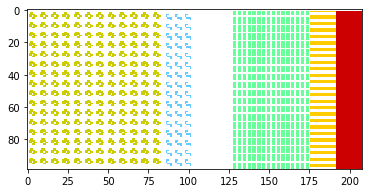

In [35]:
def update(data=''):
    global board
    if (genNum+1) % 500 == 0:
        writePatternDict([3, 0], [xlength-1, int(lumenRatio*2/3 * yRatio)-3], breeder, probiotic['id'])
    board = getNextGen()
    if genNum == 1000:
        print(inBlood)
    # update data
    img.set_data(getGrid())
    return img

fig, ax = plt.subplots()
img = ax.imshow(getGrid(), interpolation='nearest')
ani = animation.FuncAnimation(fig, update, frames=200, interval=50,
                            save_count=50)
plt.show()

In [36]:
# ani.save('testfilm.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [37]:
print('SCFA\'s:' + str(inBlood.get(9, 0)))
print('LPS:' + str(inBlood.get(10, 0)))

SCFA's:0
LPS:0
